# Importing Libraries


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset


In [102]:
# Load the dataset
df = pd.read_csv('526847700_Churn_5287578865531195.csv')

# Display the first few rows of the dataset
df.head()

,Account length,Area code,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,415,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,415,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,111,415,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,49,510,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


# Data Preprocessing


In [103]:
df.shape

(667, 16)

In [104]:
df.columns

Index(['Account length', 'Area code', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   Area code               667 non-null    int64  
 2   Total day minutes       667 non-null    float64
 3   Total day calls         667 non-null    int64  
 4   Total day charge        667 non-null    float64
 5   Total eve minutes       667 non-null    float64
 6   Total eve calls         667 non-null    int64  
 7   Total eve charge        667 non-null    float64
 8   Total night minutes     667 non-null    float64
 9   Total night calls       667 non-null    int64  
 10  Total night charge      667 non-null    float64
 11  Total intl minutes      667 non-null    float64
 12  Total intl calls        667 non-null    int64  
 13  Total intl charge       667 non-null    float64
 14  Customer service calls  667 non-null    in

In [106]:
# ecode the categorical variables
for cols in df.columns:
    if df[cols].dtype == 'bool':
        df[cols] = df[cols].astype('category')
        df[cols] = df[cols].cat.codes

df.head()


,Account length,Area code,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,415,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,415,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,415,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,510,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [107]:
# Check for missing values
df.isnull().sum()

Account length            0
Area code                 0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [108]:
# Check for duplicate rows
df.duplicated().sum()

0

# Data Visualization


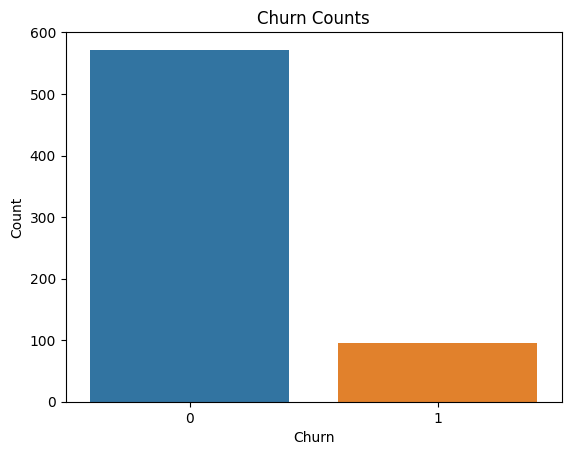

In [109]:
# Count the number of churned and non-churned customers
churn_counts = df['Churn'].value_counts()

# Create a bar plot
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Counts')
plt.show()


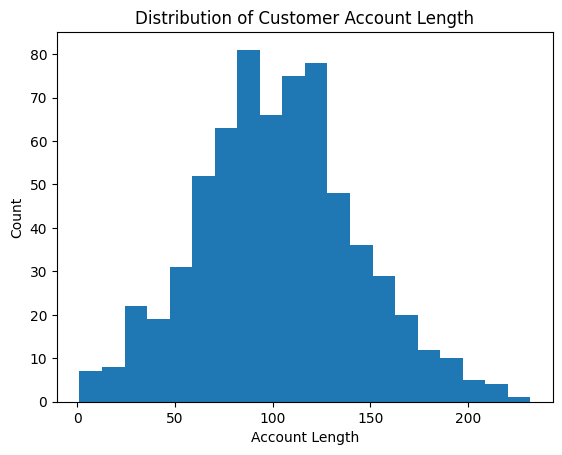

In [110]:
plt.hist(df['Account length'], bins=20)
plt.xlabel('Account Length')
plt.ylabel('Count')
plt.title('Distribution of Customer Account Length')
plt.show()


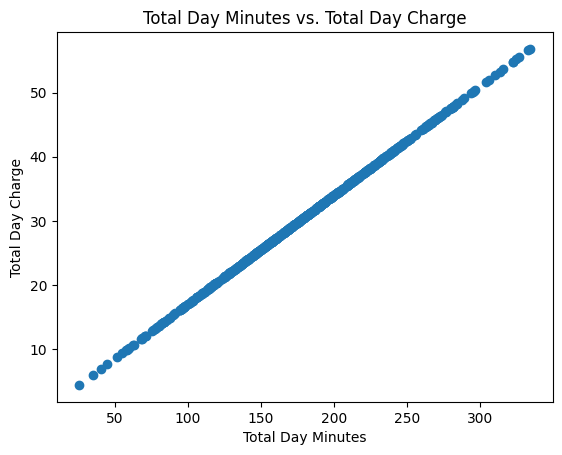

In [111]:
plt.scatter(df['Total day minutes'], df['Total day charge'])
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.title('Total Day Minutes vs. Total Day Charge')
plt.show()


# Correlation Matric


In [112]:
corr_matrix = df.corr()

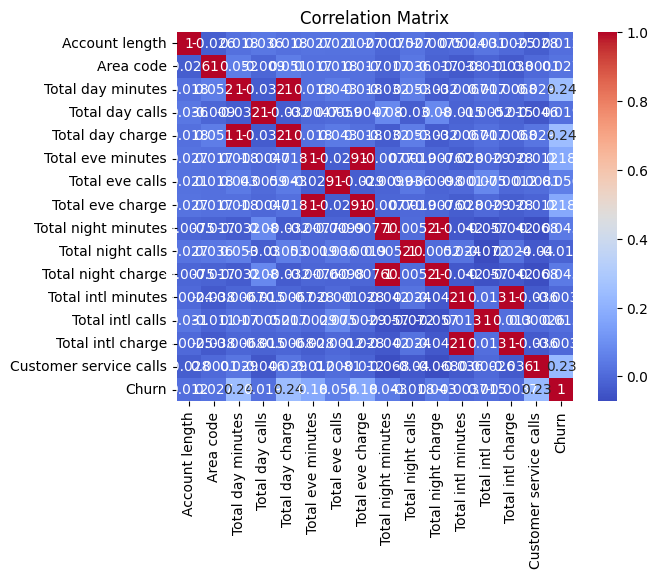

In [113]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Dropping Higly Correlated Columns


In [114]:
# Set the correlation threshold
threshold = 0.8

# Find highly correlated feature pairs
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly Correlated Features:", high_corr_features)


Highly Correlated Features: {'Total intl charge', 'Total eve charge', 'Total day charge', 'Total night charge'}


In [115]:
df_dropped = df.drop(columns=high_corr_features)

# This part of the could was for the expriementation of dropping the columns that are highly correlated with each other and to fill the summary table
# drop every column except Total day minutes, Total night calls, Total intl charge and Customer service calls
# df_dropped = df.drop(columns=['Account length', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Total day calls', 'Total intl minutes', 'Total night minutes', 'Total eve minutes', 'Total eve calls', 'Total intl calls', 'Total night calls'])
# df_dropped.columns


# Target and Feature


In [116]:
X = df_dropped.drop(columns=['Churn'])
y = df_dropped['Churn']

# Splitting the Data into Test and Train


In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)


# Scaling the Data


In [118]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K Nearest Neighbour


In [119]:
# applying the KNN algorithm
metric = ['euclidean', 'manhattan']

for m in metric:
    knn = KNeighborsClassifier(n_neighbors=5, metric=m)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # print the accuracy score
    print("Accuracy score for", m, ":", knn.score(X_test, y_test))

Accuracy score for euclidean : 0.8507462686567164
Accuracy score for manhattan : 0.8582089552238806
